<a href="https://colab.research.google.com/github/You2751/SoH-estimation-of-Lithium-ion-battery/blob/main/SOC_and_SOH_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.nn.utils.rnn import pad_sequence

# **Load Datasets**

In [3]:
import shutil
directory_main = os.listdir('datasets')
directory_edited = [file for file in directory_main if file != '.ipynb_checkpoints']
print(directory_main)
print(directory_edited)

print("The numbers of datasets:", len(directory_main))
print("The numbers of datasets:", len(directory_edited))


['B05_discharge_soh.csv', 'B34_discharge_soh.csv', 'B18_discharge_soh.csv', 'B07_discharge_soh.csv', 'B33_discharge_soh.csv', 'B48_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv']
['B05_discharge_soh.csv', 'B34_discharge_soh.csv', 'B18_discharge_soh.csv', 'B07_discharge_soh.csv', 'B33_discharge_soh.csv', 'B48_discharge_soh.csv', 'B46_discharge_soh.csv', 'B47_discharge_soh.csv']
The numbers of datasets: 8
The numbers of datasets: 8


In [4]:
num = ['B05', 'B07', 'B18', 'B33', 'B34', 'B46', 'B47', 'B48']
for i in range(len(directory_edited)):
    vector = np.zeros((1,3))
    path = os.path.join(os.getcwd(), 'datasets/', num[i] + '_discharge_soh.csv')
    csv = pd.read_csv(path)
    df = pd.DataFrame(csv)

    vec = df[['cycle', 'capacity', 'SOH']]

    globals()['data_{}'.format(num[i])] = vec

In [5]:
data = pd.read_csv('datasets/B05_discharge_soh.csv')
df = pd.DataFrame(data)
df

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244
...,...,...,...,...,...,...,...,...,...
50280,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,168,0.662540
50281,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,168,0.662540
50282,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,168,0.662540
50283,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,168,0.662540


In [6]:
data_B05

,cycle,capacity,SOH
0,1,1.856487,0.928244
1,1,1.856487,0.928244
2,1,1.856487,0.928244
3,1,1.856487,0.928244
4,1,1.856487,0.928244
...,...,...,...
50280,168,1.325079,0.662540
50281,168,1.325079,0.662540
50282,168,1.325079,0.662540
50283,168,1.325079,0.662540


# **Data Visualization**

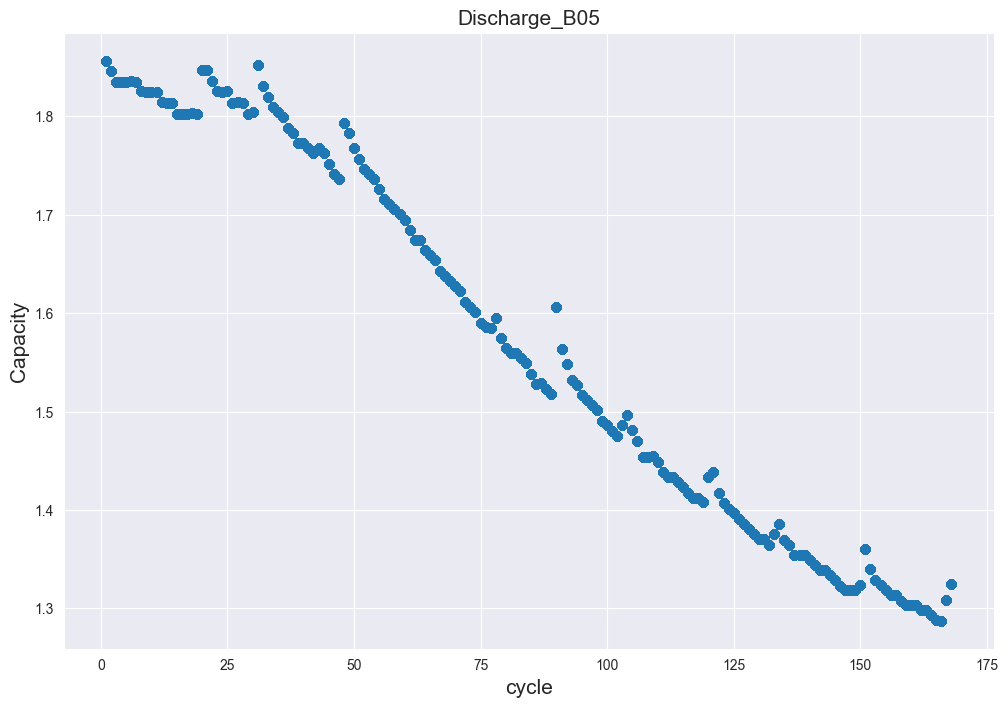

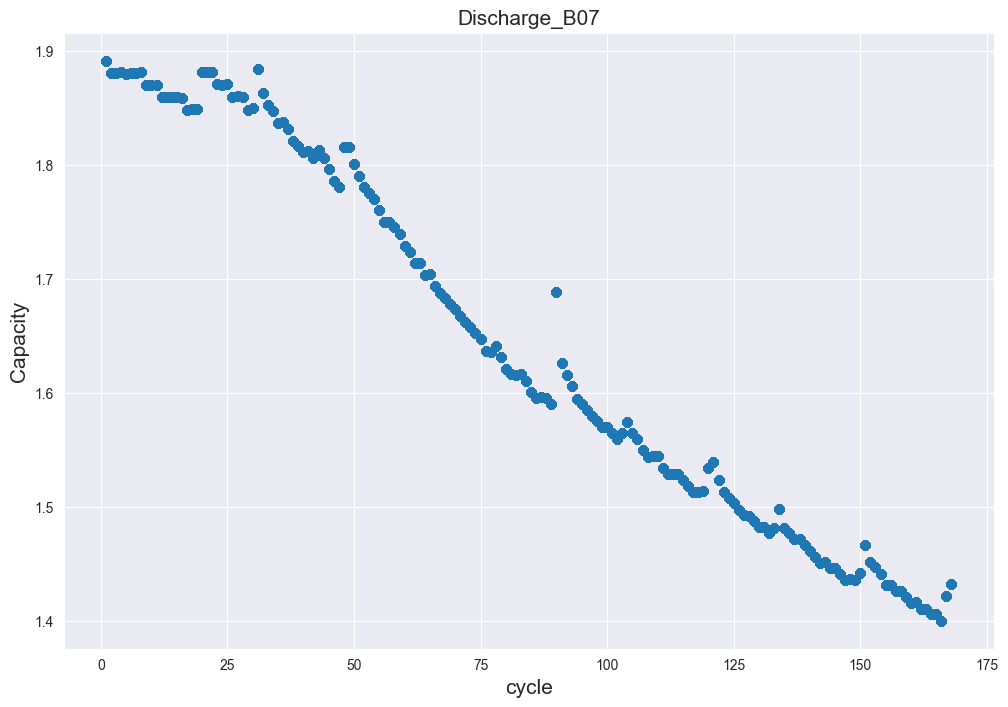

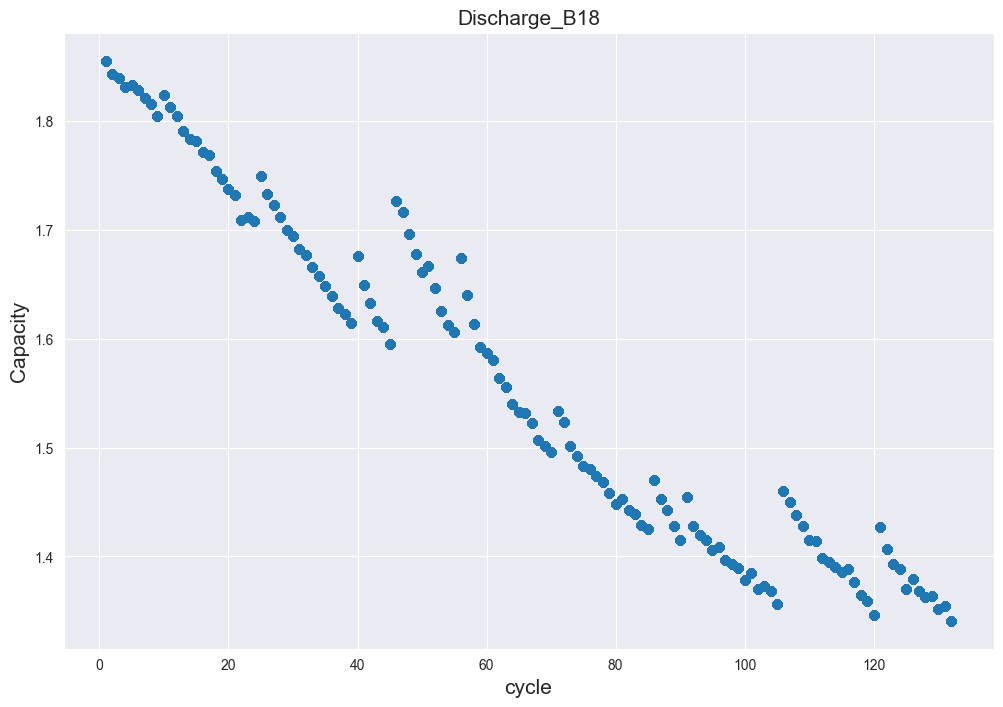

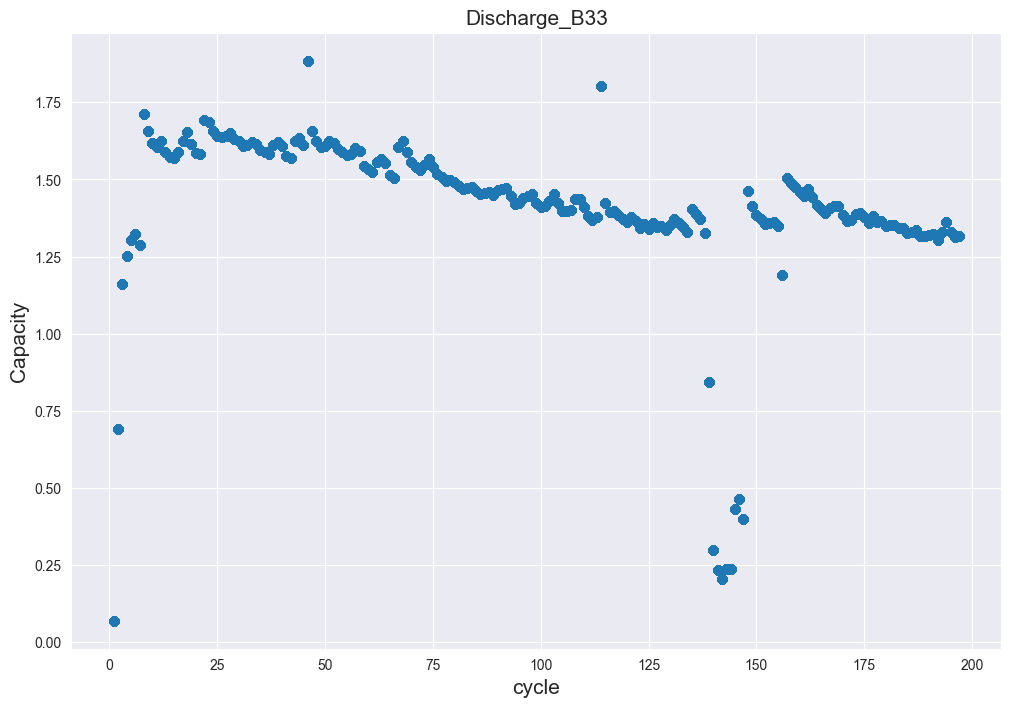

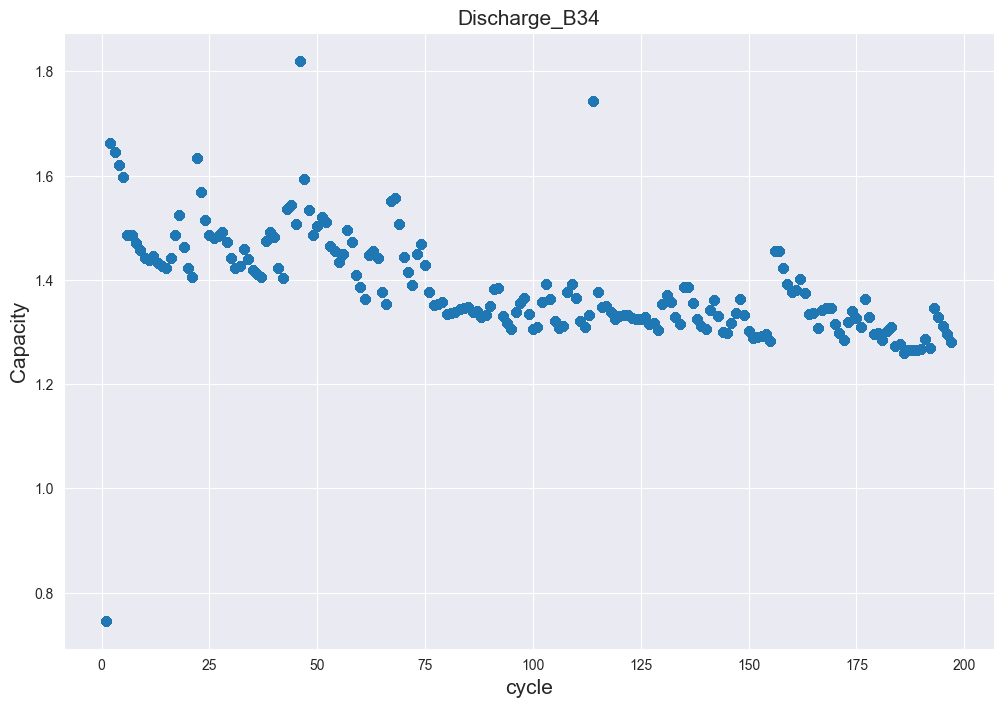

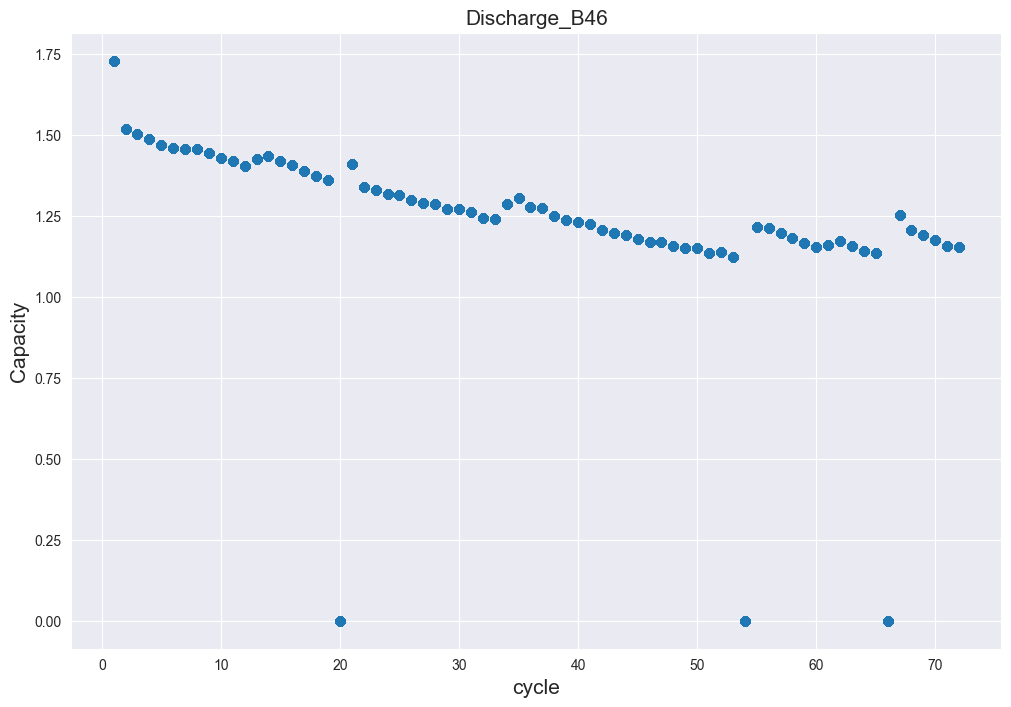

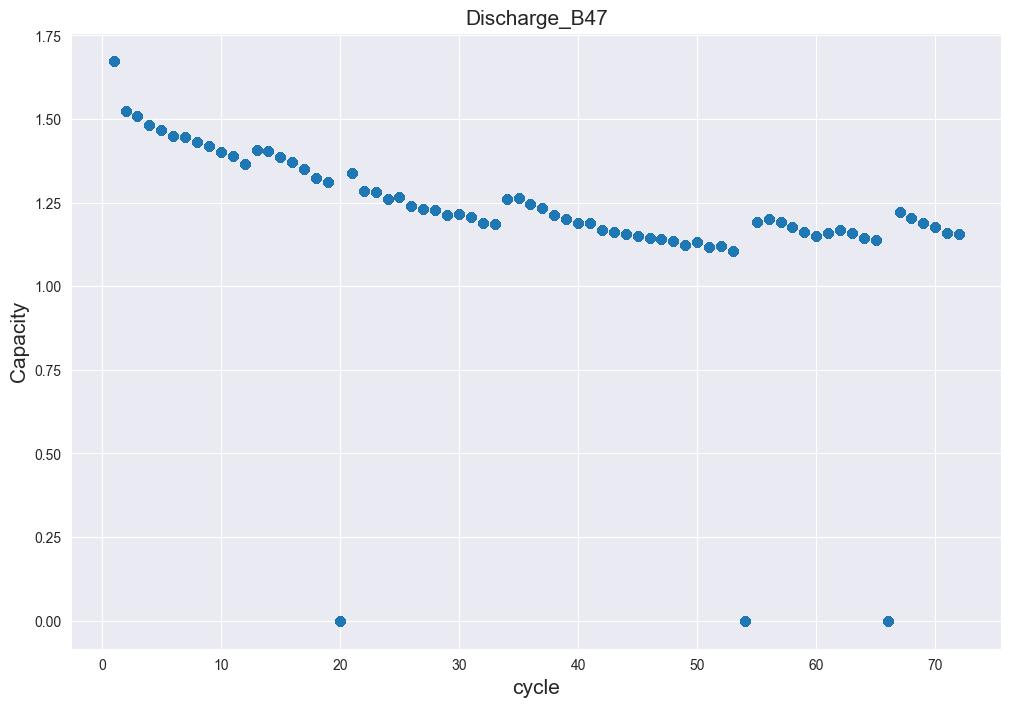

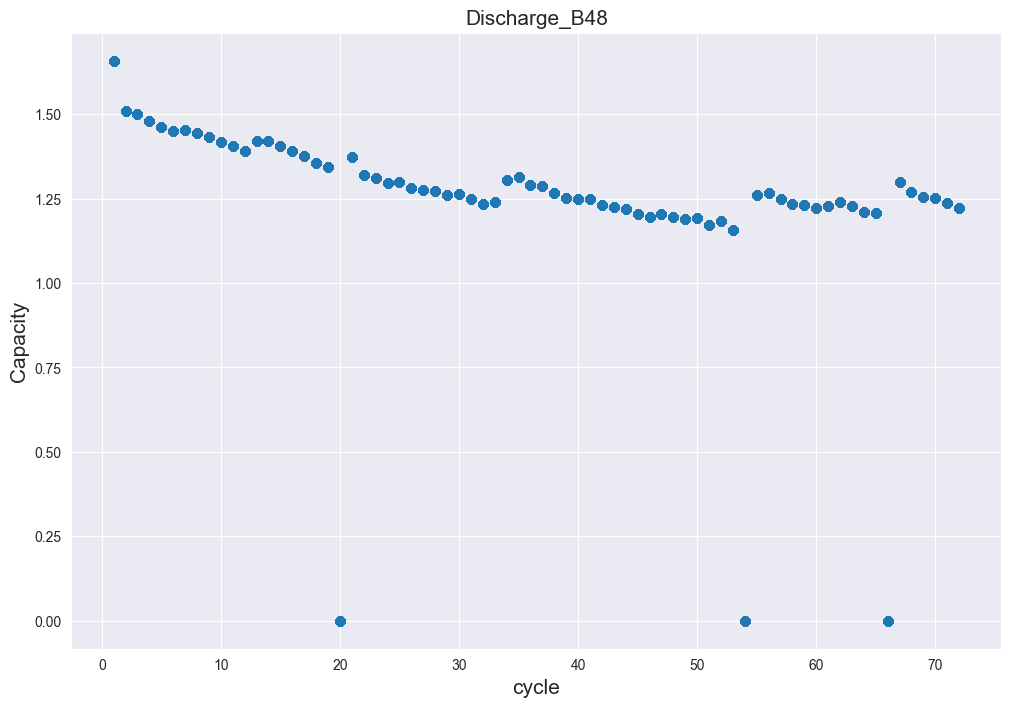

In [7]:
for i in range(len(directory_edited)) :

    dff = globals()['data_{}'.format(num[i])]

    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 8))

    plt.scatter(dff['cycle'], dff['capacity'])

    plt.ylabel('Capacity', fontsize = 15)
    plt.xlabel('cycle', fontsize = 15)
    plt.title('Discharge_' + num[i], fontsize = 15)
    plt.show()

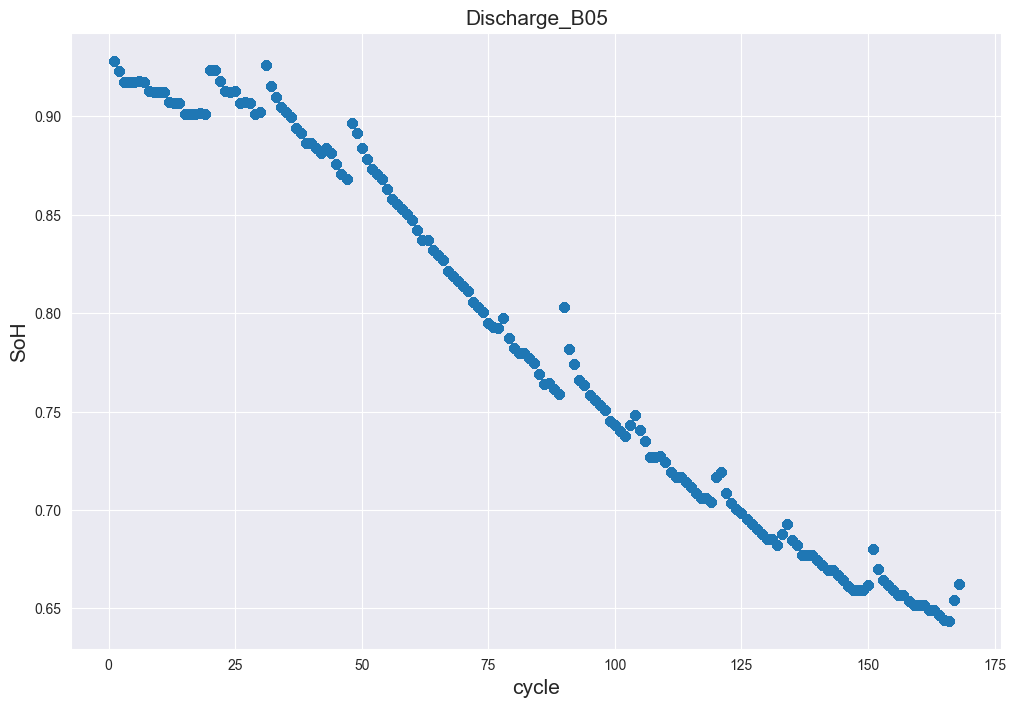

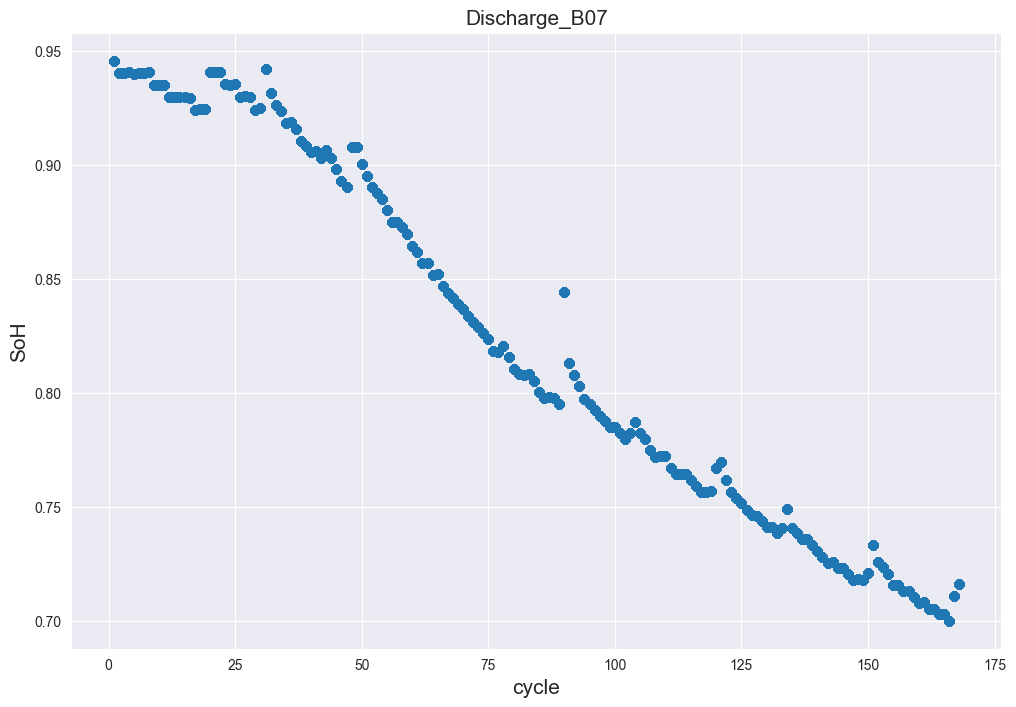

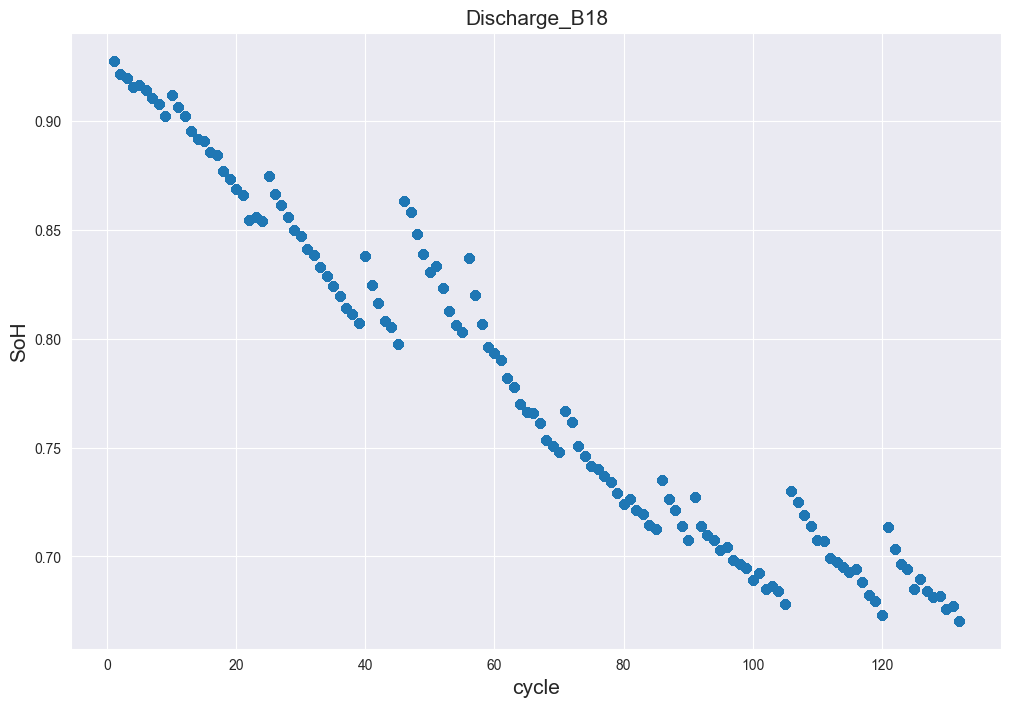

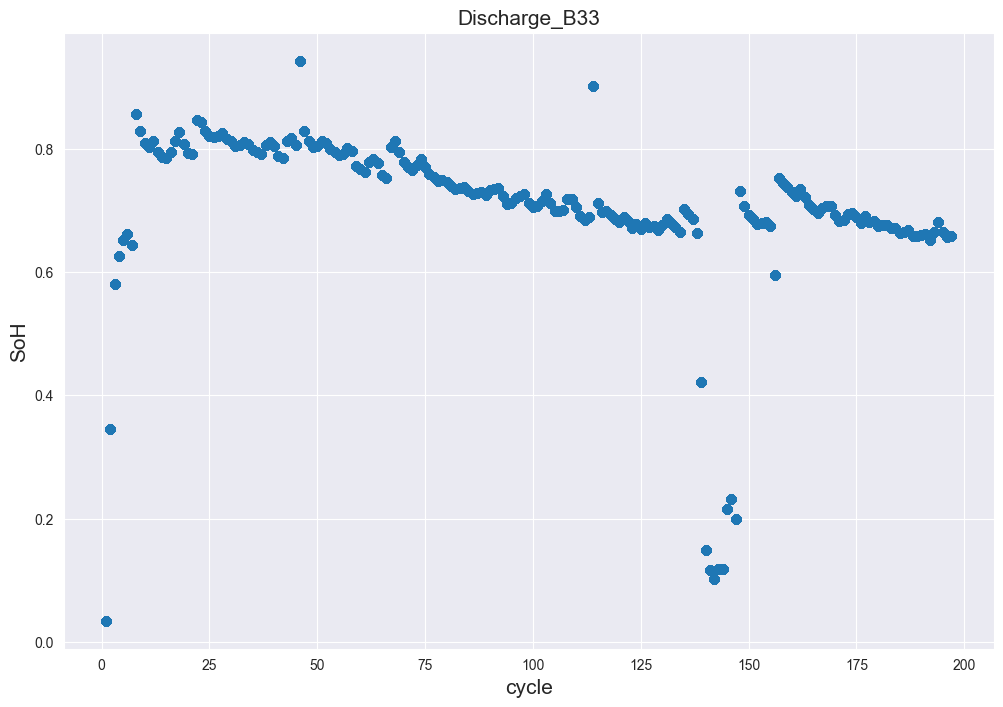

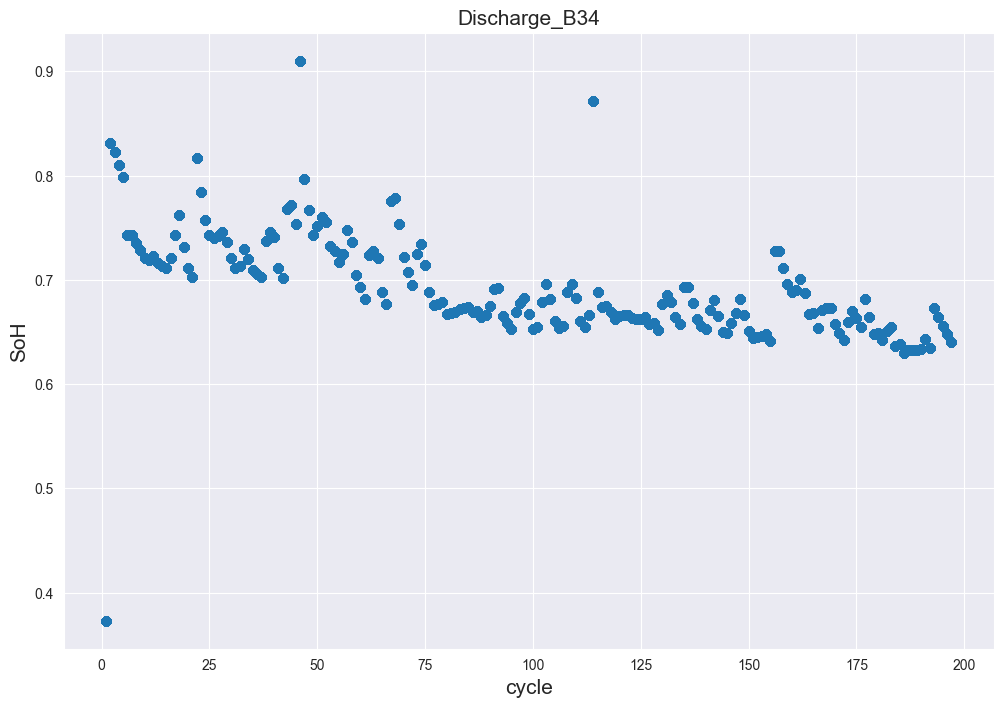

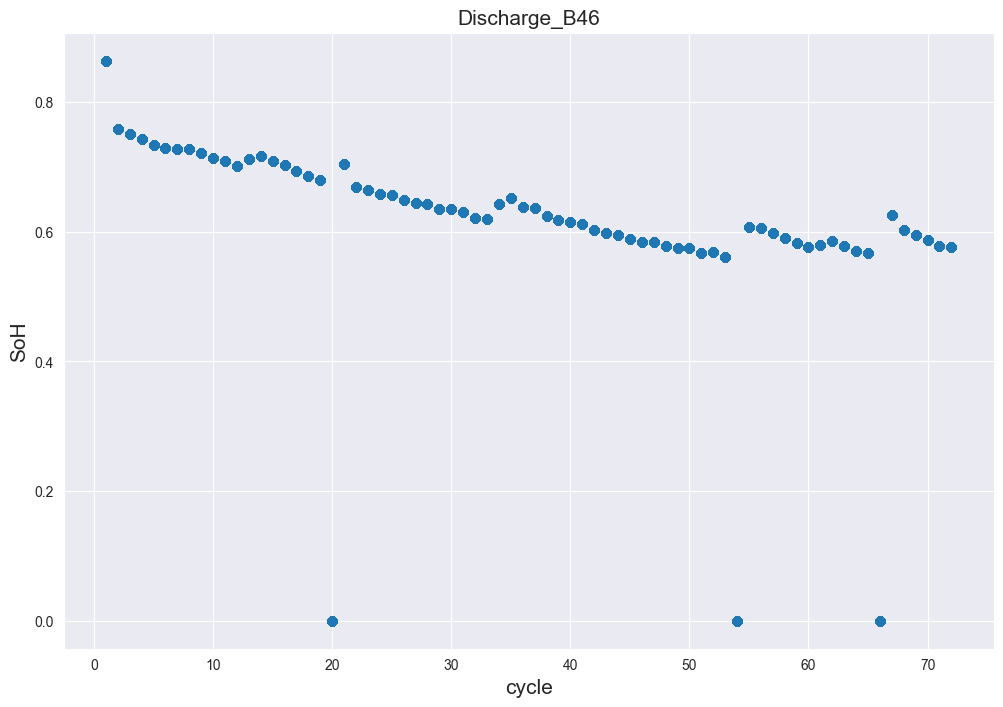

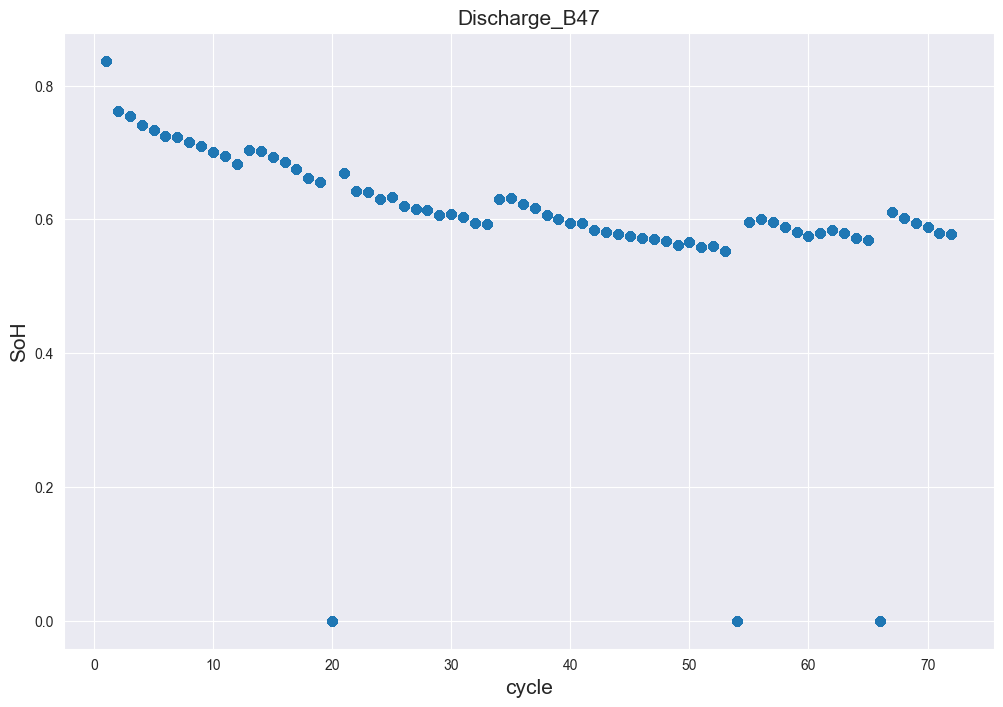

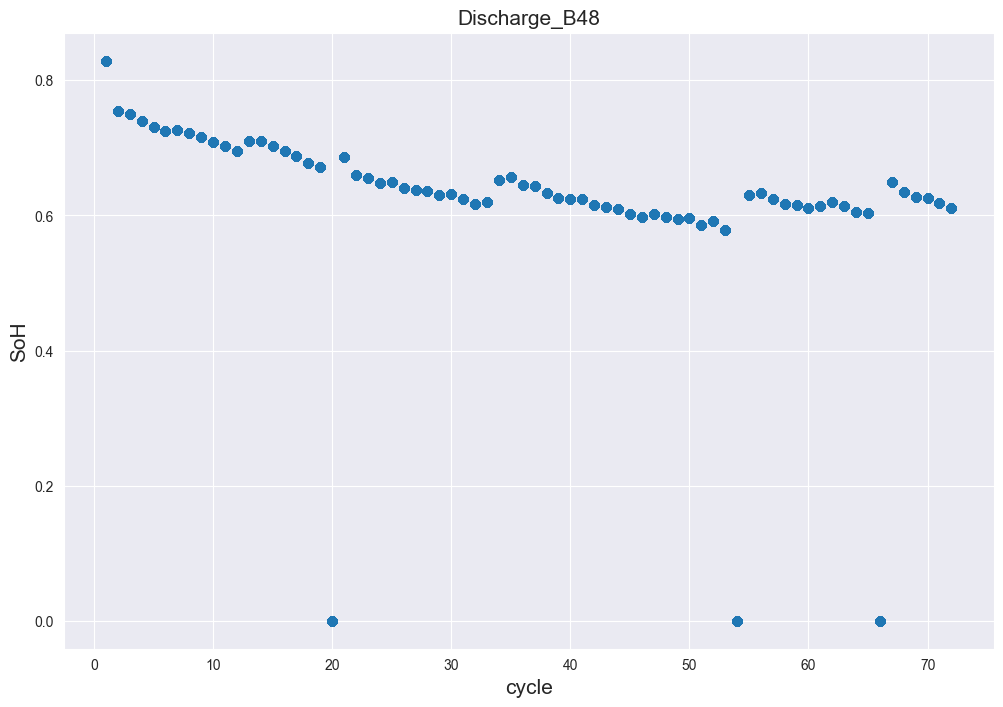

In [8]:
for i in range(len(directory_edited)) :

    dff = globals()['data_{}'.format(num[i])]

    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 8))

    plt.scatter(dff['cycle'], dff['SOH'])

    plt.ylabel('SoH', fontsize = 15)
    plt.xlabel('cycle', fontsize = 15)
    plt.title('Discharge_' + num[i], fontsize = 15)
    plt.show()

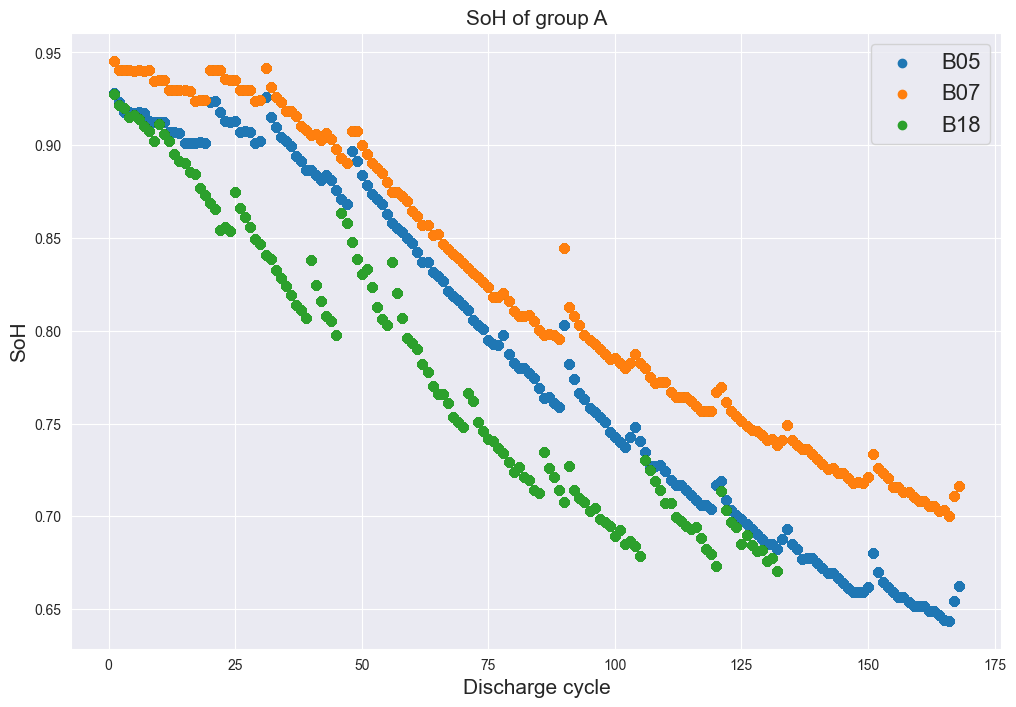

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_B05['cycle'], data_B05['SOH'],label='B05')
plt.scatter(data_B07['cycle'], data_B07['SOH'],label='B07')
plt.scatter(data_B18['cycle'], data_B18['SOH'],label='B18')

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15)
plt.xlabel('Discharge cycle', fontsize = 15)
plt.title('SoH of group A', fontsize = 15)
plt.show()

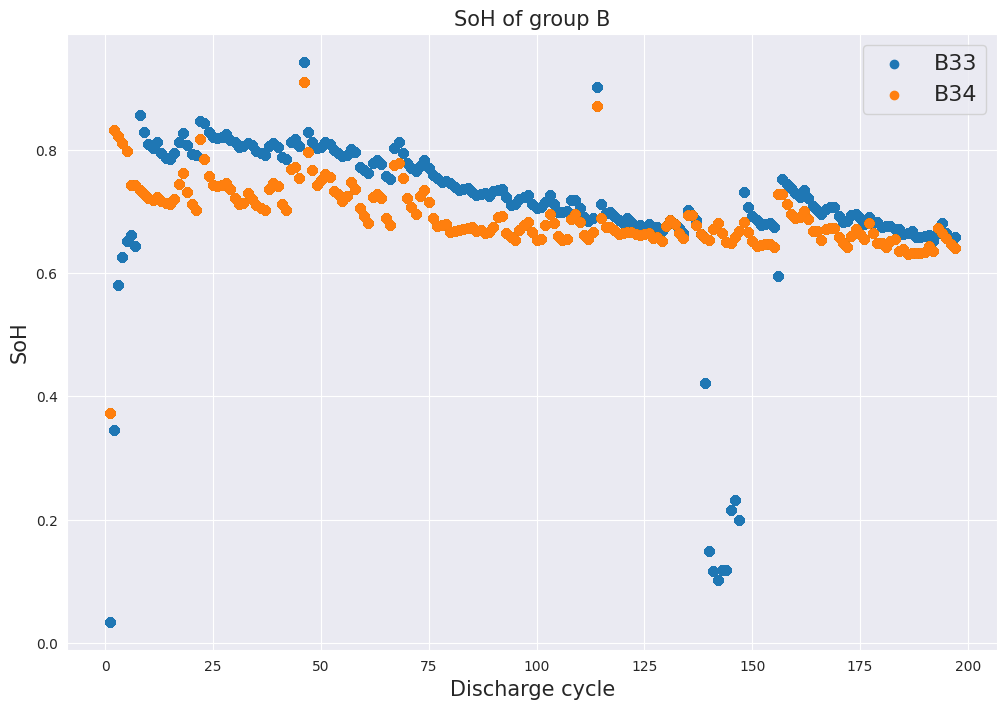

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_B33['cycle'], data_B33['SOH'],label='B33')
plt.scatter(data_B34['cycle'], data_B34['SOH'],label='B34')

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15)
plt.xlabel('Discharge cycle', fontsize = 15)
plt.title('SoH of group B', fontsize = 15)
plt.show()

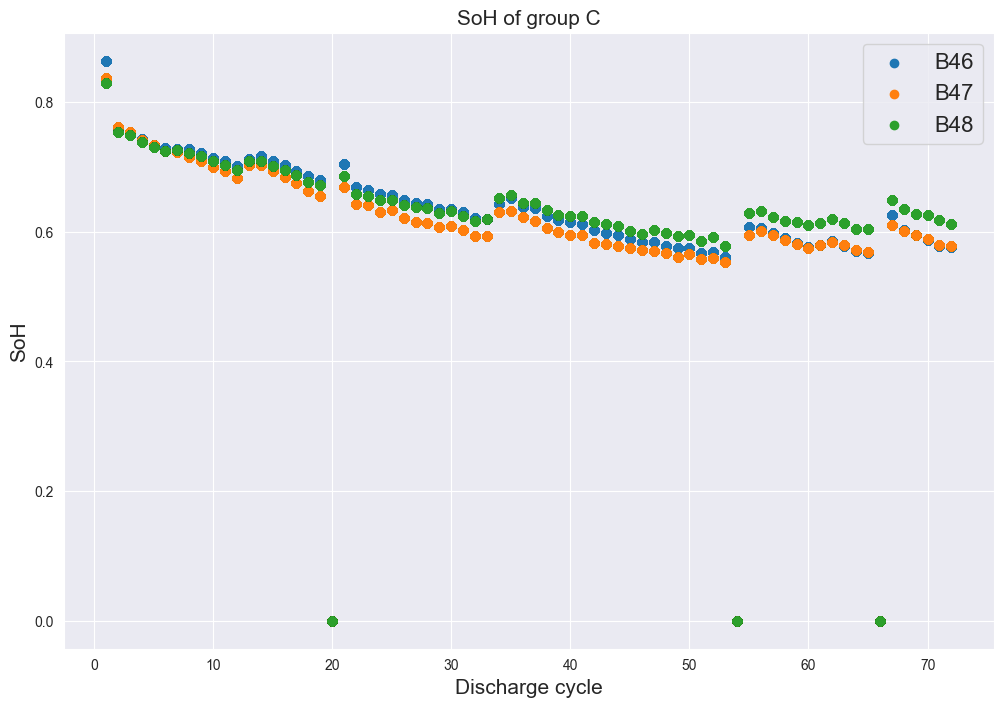

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.scatter(data_B46['cycle'], data_B46['SOH'],label='B46')
plt.scatter(data_B47['cycle'], data_B47['SOH'],label='B47')
plt.scatter(data_B48['cycle'], data_B48['SOH'],label='B48')

plt.legend(prop={'size': 16})

plt.ylabel('SoH', fontsize = 15)
plt.xlabel('Discharge cycle', fontsize = 15)
plt.title('SoH of group C', fontsize = 15)
plt.show()

In [11]:
dataset = data_B48["SOH"]
cycle = data_B48['cycle']

dataset = np.array(dataset)
dataset = dataset.reshape((len(dataset),1))
dataset.shape

(24519, 1)

# **Split Train/Test**

In [12]:
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

12259 12260


In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

12258
12259


In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(12258, 1, 1)
(12259, 1, 1)


In [16]:


# Assuming trainX.shape[1] is the number of features, and trainX.shape[2] is the sequence length
input_size = trainX.shape[2]
hidden_size = 64
output_size = 1

# Create the PyTorch model
model = nn.Sequential(
    nn.LSTM(input_size, hidden_size, batch_first=True),
    nn.Linear(hidden_size, output_size)
)

# Loss function and optimizer
criterion = nn.L1Loss()  # Equivalent to 'mae' loss
optimizer = torch.optim.Adam(model.parameters())


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Assuming trainX, trainY, testX, and testY are PyTorch tensors or converted to PyTorch tensors

# Assuming input_size, hidden_size, and output_size are specified
input_size = trainX.shape[2]
hidden_size = 64
output_size = 1

# Define the PyTorch model
class MyLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        output = self.fc(lstm_out[:, -1, :])  # Use the last time step's output
        return output

# Create an instance of your model
model = MyLSTMModel(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.L1Loss()  # Equivalent to 'mae' loss
optimizer = optim.Adam(model.parameters())

# Convert trainX and trainY to PyTorch tensors
trainX_tensor = torch.tensor(trainX, dtype=torch.float32)
trainY_tensor = torch.tensor(trainY, dtype=torch.float32)

# Training loop (you need to adjust this based on your actual use case)
num_epochs = 100
history = {'train_loss': [], 'val_loss': []}

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Assuming trainX_tensor is a 3D tensor of shape (batch_size, sequence_length, input_size)
    output = model(trainX_tensor)

    # Assuming trainY_tensor is a PyTorch tensor
    loss = criterion(output.squeeze(), trainY_tensor)

    loss.backward()
    optimizer.step()

    history['train_loss'].append(loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}')


Epoch [1/100], Train Loss: 0.7521
Epoch [2/100], Train Loss: 0.7470
Epoch [3/100], Train Loss: 0.7418
Epoch [4/100], Train Loss: 0.7367
Epoch [5/100], Train Loss: 0.7315
Epoch [6/100], Train Loss: 0.7263
Epoch [7/100], Train Loss: 0.7211
Epoch [8/100], Train Loss: 0.7158
Epoch [9/100], Train Loss: 0.7106
Epoch [10/100], Train Loss: 0.7052
Epoch [11/100], Train Loss: 0.6999
Epoch [12/100], Train Loss: 0.6944
Epoch [13/100], Train Loss: 0.6889
Epoch [14/100], Train Loss: 0.6834
Epoch [15/100], Train Loss: 0.6778
Epoch [16/100], Train Loss: 0.6721
Epoch [17/100], Train Loss: 0.6664
Epoch [18/100], Train Loss: 0.6606
Epoch [19/100], Train Loss: 0.6549
Epoch [20/100], Train Loss: 0.6490
Epoch [21/100], Train Loss: 0.6431
Epoch [22/100], Train Loss: 0.6371
Epoch [23/100], Train Loss: 0.6309
Epoch [24/100], Train Loss: 0.6247
Epoch [25/100], Train Loss: 0.6184
Epoch [26/100], Train Loss: 0.6120
Epoch [27/100], Train Loss: 0.6054
Epoch [28/100], Train Loss: 0.5987
Epoch [29/100], Train Loss: 0

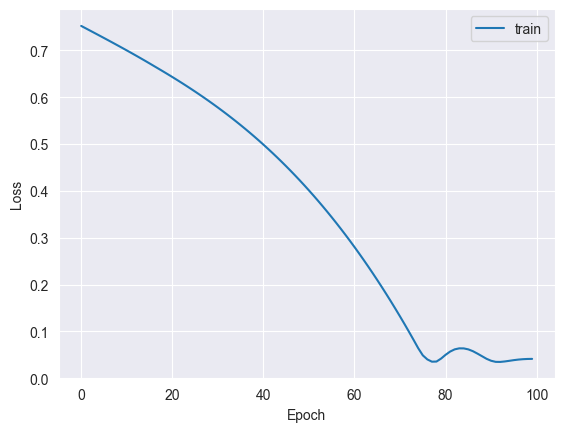

In [18]:
plt.plot(history['train_loss'], label='train')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import torch
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'model' is your trained PyTorch model
# Assuming 'testX', 'trainX', 'testY', 'trainY' are your data

# Convert 'testX' and 'trainX' to PyTorch tensors
testX_tensor = torch.tensor(testX, dtype=torch.float32)
trainX_tensor = torch.tensor(trainX, dtype=torch.float32)

# Set the model to evaluation mode
model.eval()

# Make predictions using PyTorch
with torch.no_grad():
    yhat_test_torch = model(testX_tensor).squeeze().numpy()
    yhat_train_torch = model(trainX_tensor).squeeze().numpy()

# Assuming 'testY' and 'yhat_test_torch' are numpy arrays or PyTorch tensors
# Convert 'testY' to numpy array if it is a PyTorch tensor
testY = testY.numpy() if torch.is_tensor(testY) else testY

# Calculate RMSE and MAE for the test set
rmse = math.sqrt(mean_squared_error(testY, yhat_test_torch))
mae = mean_absolute_error(testY, yhat_test_torch)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)


Test RMSE: 0.092
Test MAE: 0.044
